/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:106: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


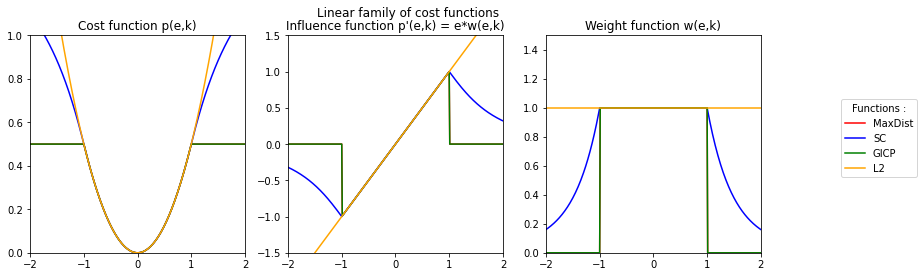

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:145: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


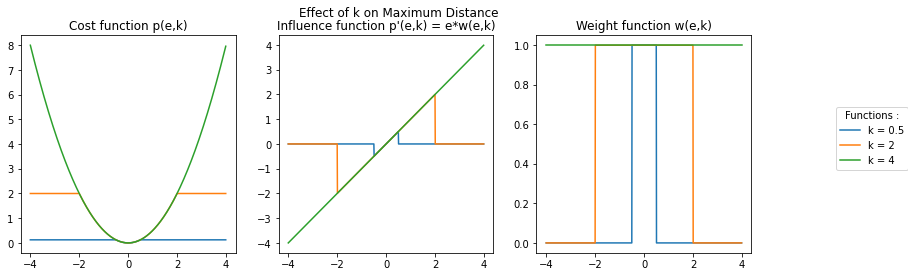

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:180: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


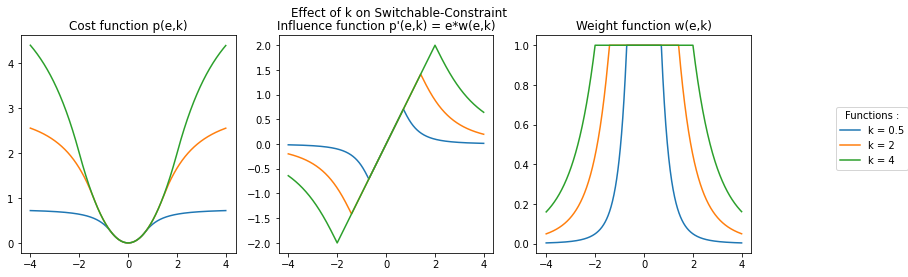

/home/nm/Bureau/Jupyter_dir/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:207: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


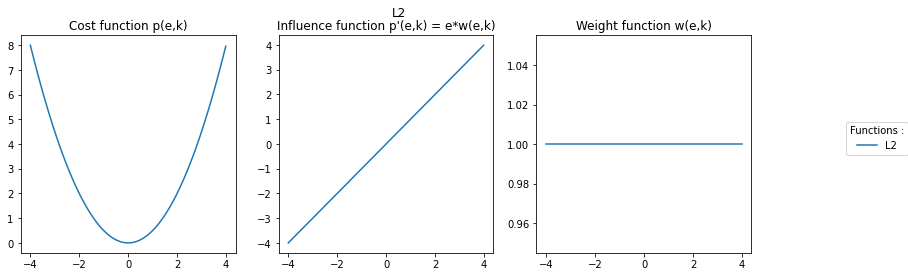

In [2]:
import matplotlib.pyplot as plt
import numpy as np

e = np.arange(-4,4,0.01)

#---------------------------LINEAR FAMILY----------------------------------------
def MaxDist(e,k):
    p = [0 for i in range(e.size)]
    w = [0 for i in range(e.size)]
    m = [0 for i in range(e.size)]
    for i in range (e.size):
        if(np.absolute(e[i])<=k):
            p[i] = np.power(e[i],2)/2
            w[i] = 1
            m[i] = p[i]*w[i]
        else:
            p[i] = np.power(k,2)/2
            w[i] = 0
            m[i] = p[i]*w[i]
    i = w*e
    return (p,w,i,m)

def L2(e):
    p = (e*e)/2
    w = [1 for i in range (e.size)]
    i = w*e
    m = p*w
    return (p,w,i,m)

def SC(e,k):
    p = [0 for i in range (e.size)]
    w = [0 for i in range (e.size)]
    m = [0 for i in range (e.size)]
    for i in range (e.size):
        if (np.power(e[i],2)<=k):
            p[i] = np.power(e[i],2)/2
            w[i] = 1
            m[i] = p[i]*w[i]
        else:
            p[i] = ((2*k*np.power(e[i],2))/(k+np.power(e[i],2)))-(k/2)
            w[i] = (4*np.power(k,2))/(np.power((k+np.power(e[i],2)),2))
            m[i] = p[i]*w[i]
    i = w*e
    return (p,w,i,m)

def GICP(e,k):
    p = [0 for i in range(e.size)]
    w = [0 for i in range(e.size)]
    m = [0 for i in range(e.size)]
    for i in range (e.size):
        if(np.absolute(e[i])<=k):
            p[i] = np.power(e[i],2)/2
            w[i] = 1
            m[i] = p[i]*w[i]
        else:
            p[i] = np.power(k,2)/2
            w[i] = 0
            m[i] = p[i]*w[i]
    i = w*e
    return (p,w,i,m)
#---------------------------PLOTTING----------------------------------------------
(p_MaxDist,w_MaxDist,i_MaxDist,m_MaxDist) = MaxDist(e,1)
(p_SC,w_SC,i_SC,m_SC) = SC(e,1)
(p_GICP,w_GICP,i_GICP,m_GICP) = GICP(e,1)
(p_L2,w_L2,i_L2,m_L2) = L2(e)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Linear family of cost functions')

# Labels to use in the legend for each line
line_labels = ["MaxDist", "SC", "GICP", "L2"]

# Create the sub-plots, assigning a different color for each line.
# Also store the line objects created

ax1.set_xlim([-2,2])
ax1.set_ylim([-0,1])
ax1.title.set_text('Cost function p(e,k)')
l1 = ax1.plot(e, p_MaxDist, color="red")[0]
l2 = ax1.plot(e, p_SC, color="blue")[0]
l3 = ax1.plot(e, p_GICP, color="green")[0]
l4 = ax1.plot(e, p_L2, color="orange")[0]

ax2.set_xlim([-2,2])
ax2.set_ylim([-1.5,1.5])
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
l5 = ax2.plot(e, i_MaxDist, color="red")[0]
l6 = ax2.plot(e, i_SC, color="blue")[0]
l7 = ax2.plot(e, i_GICP, color="green")[0]
l8 = ax2.plot(e, i_L2, color="orange")[0]

ax3.set_xlim([-2,2])
ax3.set_ylim([0,1.5])
ax3.title.set_text('Weight function w(e,k)')
l9 = ax3.plot(e, w_MaxDist, color="red")[0]
l10= ax3.plot(e, w_SC, color="blue")[0]
l11= ax3.plot(e, w_GICP, color="green")[0]
l12= ax3.plot(e, w_L2, color="orange")[0]


# Create the legend
fig.legend([l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, l11, l12],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
plt.subplots_adjust(right=0.85)

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Maximum Distance')

# Labels to use in the legend for each line
line_labels = ["k = 0.5", "k = 2", "k = 4"]

(p,w,i,m) = MaxDist(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = MaxDist(e,2)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = MaxDist(e,4)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

    
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)') 

# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('Effect of k on Switchable-Constraint')

# Labels to use in the legend for each line
line_labels = ["k = 0.5", "k = 2", "k = 4"]

(p,w,i,m) = SC(e,0.5)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = SC(e,2)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]

(p,w,i,m) = SC(e,4)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]
    
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)') 

# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()

#GICP = MaxDist

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14,4))
fig.suptitle('L2')

# Labels to use in the legend for each line
line_labels = ["L2"]

(p,w,i,m) = L2(e)
l1 = ax1.plot(e, p)[0]
l2 = ax2.plot(e, i)[0]
l3 = ax3.plot(e, w)[0]
    
ax1.title.set_text('Cost function p(e,k)')
ax2.title.set_text("Influence function p'(e,k) = e*w(e,k)")
ax3.title.set_text('Weight function w(e,k)') 

# Create the legend
fig.legend([l1, l2, l3],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="center right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Functions :",  # Title for the legend
           )
plt.subplots_adjust(right=0.85)
plt.show()
